In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files and concatenate them
df1 = pd.read_csv("Q_67_previous-1950-2023_RR-T-Vent.csv", sep=";")
df2 = pd.read_csv("Q_67_latest-2024-2025_RR-T-Vent.csv", sep=";")
df = pd.concat([df1, df2], ignore_index=True)

In [13]:
# Only keep relevant columns
df = df[["NOM_USUEL", "TX", "AAAAMMJJ"]]
# Convert 
df["AAAAMMJJ"] = pd.to_datetime(df["AAAAMMJJ"], format="%Y%m%d", errors="coerce")
print(df)

                  NOM_USUEL    TX   AAAAMMJJ
0              ALTECKENDORF   NaN 1955-10-01
1              ALTECKENDORF   NaN 1955-10-02
2              ALTECKENDORF   NaN 1955-10-03
3              ALTECKENDORF   NaN 1955-10-04
4              ALTECKENDORF   NaN 1955-10-05
...                     ...   ...        ...
798006  WALTENHEIM-SUR-ZORN  30.9 2025-08-08
798007  WALTENHEIM-SUR-ZORN  32.5 2025-08-09
798008  WALTENHEIM-SUR-ZORN  27.2 2025-08-10
798009  WALTENHEIM-SUR-ZORN  28.8 2025-08-11
798010  WALTENHEIM-SUR-ZORN  31.1 2025-08-12

[798011 rows x 3 columns]


In [14]:
# Filter by station name
df = df[df["NOM_USUEL"].str.contains("STRASBOURG-ENTZHEIM", case=False, na=False)]
# Group by year and month
df["ANNEE"] = df["AAAAMMJJ"].dt.year
df["MOIS"] = df["AAAAMMJJ"].dt.month
print(df)

                  NOM_USUEL    TX   AAAAMMJJ  ANNEE  MOIS
171591  STRASBOURG-ENTZHEIM   0.6 1950-01-01   1950     1
171592  STRASBOURG-ENTZHEIM   2.8 1950-01-02   1950     1
171593  STRASBOURG-ENTZHEIM   3.0 1950-01-03   1950     1
171594  STRASBOURG-ENTZHEIM   6.9 1950-01-04   1950     1
171595  STRASBOURG-ENTZHEIM   8.2 1950-01-05   1950     1
...                     ...   ...        ...    ...   ...
792106  STRASBOURG-ENTZHEIM  32.3 2025-08-08   2025     8
792107  STRASBOURG-ENTZHEIM  33.6 2025-08-09   2025     8
792108  STRASBOURG-ENTZHEIM  28.4 2025-08-10   2025     8
792109  STRASBOURG-ENTZHEIM  29.9 2025-08-11   2025     8
792110  STRASBOURG-ENTZHEIM  32.3 2025-08-12   2025     8

[27618 rows x 5 columns]


    ANNEE         TX
0    1980  23.980645
1    1981  24.267742
2    1982  23.558065
3    1983  26.293548
4    1984  24.625806
5    1985  24.641935
6    1986  24.070968
7    1987  23.329032
8    1988  25.629032
9    1989  25.654839
10   1990  26.806452
11   1991  27.509677
12   1992  27.319355
13   1993  24.925806
14   1994  25.383871
15   1995  24.977419
16   1996  24.493548
17   1997  27.606452
18   1998  25.858065
19   1999  24.632258
20   2000  26.119355
21   2001  27.058065
22   2002  24.841935
23   2003  31.883871
24   2004  25.790323
25   2005  23.364516
26   2006  21.858065
27   2007  24.087097
28   2008  24.387097
29   2009  27.306452
30   2010  23.664516
31   2011  25.977419
32   2012  27.364516
33   2013  26.241935
34   2014  23.438710
35   2015  28.783871
36   2016  27.100000
37   2017  26.980645
38   2018  28.883871
39   2019  27.900000
40   2020  28.538710
41   2021  23.754839
42   2022  30.470968
43   2023  26.712903
44   2024  28.903226
45   2025  27.775000


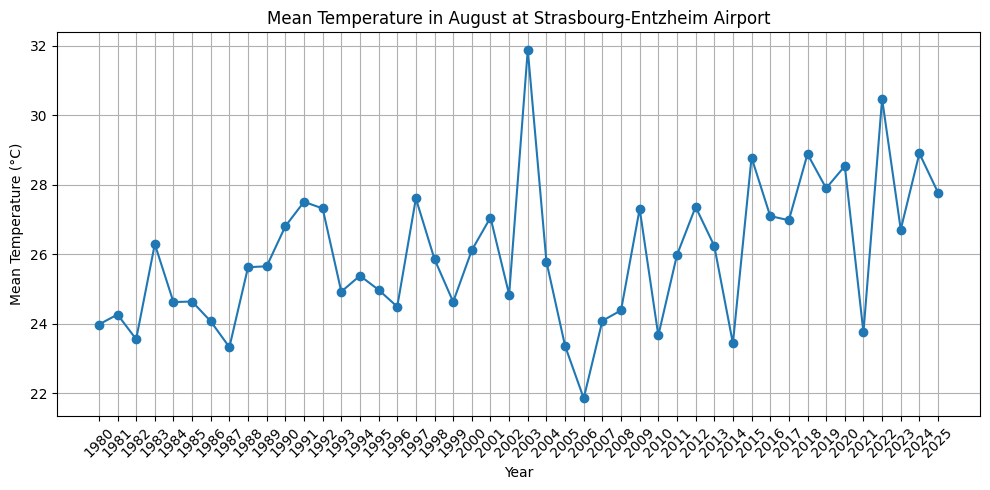

In [15]:
# Only keep data for the month of August for every year
df = df[df["MOIS"] == 8]
# Only keep data from 1980 onwards
df = df[df["ANNEE"] >= 1980]
# Group by year and calculate the mean TX
df = df.groupby("ANNEE")["TX"].mean().reset_index()
print(df)

# Draw a graph of the mean TX over the years
plt.figure(figsize=(10, 5))
plt.plot(df["ANNEE"], df["TX"], marker='o')
plt.title("Mean Temperature in August at Strasbourg-Entzheim Airport")
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")
plt.grid()
plt.xticks(df["ANNEE"], rotation=45)
plt.tight_layout()
plt.show()
